# **PRCL-0017 Customer Churn Business Case**

### Business Case:

No-Churn Telecom is an established Telecom operator in Europe
with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and
retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting
more offers, the churn rate (percentage of customers migrating to
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help
with following use cases to retain competitive edge in the industry.

In this project, we are addressing a classification problem known as customer churn prediction. Our goal is to develop a model that can accurately classify customers as either churners or non-churners.

Considering the imbalanced nature of the data, where churn events are less frequent compared to non-churn events, we have chosen the F1 score as our primary performance metric. The F1 score balances precision and recall, allowing us to evaluate the model's ability to identify churners while minimizing false predictions.

By focusing on the F1 score, we aim to develop a robust churn prediction model that accurately identifies churners and provides No-Churn Telecom with the insights needed to implement tailored retention strategies. This approach will help improve customer loyalty and satisfaction while maximizing the effectiveness of resource allocation for retention campaigns.

## PROJECT GOAL
Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers to migrate.
2. Creating Churn risk scores that can be indicative to drive retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values
YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.


This will help to identify possible CHURN-FLAG YES customers and provide
more attention in customer touch point areas, including customer
care support, request fulfilment, auto categorizing tickets as high
priority for quick resolutions any questions they may have etc

## Dataset
The dataset consists of 4,617 entries (rows) and 21 columns. The features include a mix of categorical (state, phone, international_plan, vmail_plan, churn) and numerical

* state: The state in which the customer resides (categorical)
* account_length: The number of days the customer has been with the company (numerical)
* area_code: The area code of the customer's phone number (numerical)
* phone: The customer's phone number (categorical)
* international_plan: Whether the customer has an international calling plan (categorical)
* vmail_plan: Whether the customer has a voicemail plan (categorical)
* vmail_message: The number of voicemail messages the customer has (numerical)
* day_mins: The total number of minutes the customer used during the day (numerical)
* day_calls: The number of calls made by the customer during the day (numerical)
* day_charge: The cost of the day calls for the customer (numerical)
* eve_mins: The total number of minutes the customer used during the evening (numerical)
* eve_calls: The number of calls made by the customer during the evening (numerical)
* eve_charge: The cost of the evening calls for the customer (numerical)
* night_mins: The total number of minutes the customer used during the night (numerical)
* night_calls: The number of calls made by the customer during the night (numerical)
* night_charge: The cost of the night calls for the customer (numerical)
* international_mins: The total number of international minutes used by the customer (numerical)
* international_calls: The number of international calls made by the customer (numerical)
* international_charge: The cost of the international calls for the customer (numerical)
* custServ_calls: The number of customer service calls made by the customer (numerical)
* churn: Whether the customer churned or not (categorical)

In [ ]:
! pip install pymysql
! pip install mysql_connector

### Importing Libraries

In [ ]:
#basic
import numpy as np
import pandas as pd   #once we get tabular data we will be store it in df
import geopandas as gpd
import os

#sql
import mysql.connector

#visaualisation
import matplotlib.pyplot as plt
import seaborn as sns

#feature selection
from sklearn.feature_selection import RFE

#data processing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

#model selection
from sklearn.model_selection import cross_val_score,KFold, cross_val_predict
from sklearn.model_selection import train_test_split

#model development
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, roc_auc_score

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#deployment
import pickle

#warnings
import warnings
warnings.filterwarnings('ignore')

#set style
sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

In [ ]:
#first have to create connection
connection=  mysql.connector.connect(host='18.136.157.135',
user= 'dm_team3',
password= 'DM!$!Team!27@9!20&')


In [ ]:
#reason we create cursor is to execute database
cursor = connection.cursor()  #to see all the tables
cursor.execute('show databases')

In [ ]:
for i in cursor:
  print(i)

('information_schema',)
('project_telecom',)


In [ ]:
#to connect to project telecom
connection=  mysql.connector.connect(host='18.136.157.135',
user= 'dm_team3',
password= 'DM!$!Team!27@9!20&', database = 'project_telecom')
#now I'm connecting particularly to prjct_telecom instead  of connctng to whole database

In [ ]:
#how mant tables r prsnt in this partculr database
#using pandas we can read sql queries
db_tables = pd.read_sql_query('show tables', connection)
print(db_tables)

  Tables_in_project_telecom
0        telecom_churn_data


In [ ]:
query = 'select * from telecom_churn_data'
df = pd.read_sql(query, connection)

In [ ]:
df  #this is the dataframe(table) present in o/p(telecom_churn_data)

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [ ]:
#changing column names
df.columns=['state', 'account_length', 'area_code', 'phone', 'international_plan', 'vmail_plan', 'vmail_message', 'day_mins',
            'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge',
            'international_mins', 'international_calls', 'international_charge', 'custServ_calls', 'churn']
df.head(3)

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.


## Basic Checks

In [ ]:
df.shape

(4617, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 4617 non-null   object
 1   account_length        4617 non-null   object
 2   area_code             4617 non-null   object
 3   phone                 4617 non-null   object
 4   international_plan    4617 non-null   object
 5   vmail_plan            4617 non-null   object
 6   vmail_message         4617 non-null   object
 7   day_mins              4617 non-null   object
 8   day_calls             4617 non-null   object
 9   day_charge            4617 non-null   object
 10  eve_mins              4617 non-null   object
 11  eve_calls             4617 non-null   object
 12  eve_charge            4617 non-null   object
 13  night_mins            4617 non-null   object
 14  night_calls           4617 non-null   object
 15  night_charge          4617 non-null   

In [ ]:
#changing object to int and float dtype columns
df.account_length = df.account_length.astype(int)
df.area_code = df.area_code.astype(int)
df.vmail_message = df.vmail_message.astype(int)
df.day_calls = df.day_calls.astype(int)
df.eve_calls = df.eve_calls.astype(int)
df.night_calls = df.night_calls.astype(int)
df.international_calls = df.international_calls.astype(int)
df.custServ_calls  = df.custServ_calls .astype(int)

In [ ]:
df.day_mins = df.day_mins.astype(float)
df.day_charge = df.day_charge.astype(float)
df.eve_mins = df.eve_mins.astype(float)
df.eve_charge = df.eve_charge.astype(float)
df.night_mins = df.night_mins.astype(float)
df.night_charge = df.night_charge.astype(float)
df.international_mins = df.international_mins.astype(float)
df.international_charge = df.international_charge.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 4617 non-null   object 
 1   account_length        4617 non-null   int64  
 2   area_code             4617 non-null   int64  
 3   phone                 4617 non-null   object 
 4   international_plan    4617 non-null   object 
 5   vmail_plan            4617 non-null   object 
 6   vmail_message         4617 non-null   int64  
 7   day_mins              4617 non-null   float64
 8   day_calls             4617 non-null   int64  
 9   day_charge            4617 non-null   float64
 10  eve_mins              4617 non-null   float64
 11  eve_calls             4617 non-null   int64  
 12  eve_charge            4617 non-null   float64
 13  night_mins            4617 non-null   float64
 14  night_calls           4617 non-null   int64  
 15  night_charge         

* There are 4617 entries and 21 features
* Every column has 4617 non-null values indicating that there are no missing values in the data
* Memory consumed by the data is around 758 KB

In [ ]:
df.duplicated().any()

False

* There are no duplicates in the dataset

In [ ]:
df.describe()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


* The account_length column has a minimum value of 1 and a maximum value of 243.
* The vmail_message column has a minimum value of 0 and a maximum value of 51. On an average, customers sent around 8 voice mail messages.
* Customers made around 100 calls on an average during day, evening and night which made dataset balanced in that respect.
* On an average, customers talked on 180.44 mins during the day, 200.42 mins during evening, and 200.62 mins during night. This means customers tend to spend more time talking during evening and night than day.
* The average calling charges for evening is 17.03 and night is 9.02
which is much lower than that of day(30.67).
* Customers spend around 10 mins on international calls. Average international calling charge is around 3 which is significantly lesser.
* There are some customers who make very long calls during the day and even though they have to pay high charges($30).
* The international_mins column has a maximum value of 20, which suggests that there might be some outliers or high-value customers in this category.
* The custServ_calls column has a maximum value of 9, which indicates that some customers had to contact customer service multiple times, and it might be interesting to explore why they had to do so.

In [ ]:
df.describe(include='object')

,state,phone,international_plan,vmail_plan,churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


* There are 51 unique states represented in the dataset and most of the customers are from WV(149) state.
* Each phone number in the dataset is unique, which indicates that it can be used as a unique identifier for each customer.
* Most of the customers (4171 out of 4617) do not have an international plan.
* A significant number of customers (3381 out of 4617) do not have a voicemail plan.
* There are 3961 customers who did not churn, and only 656 customers churned.
* This suggests that the dataset may be imbalanced, and some additional analysis may be required to handle this.

## Exploratory Data Analysis


### Univariate Analysis

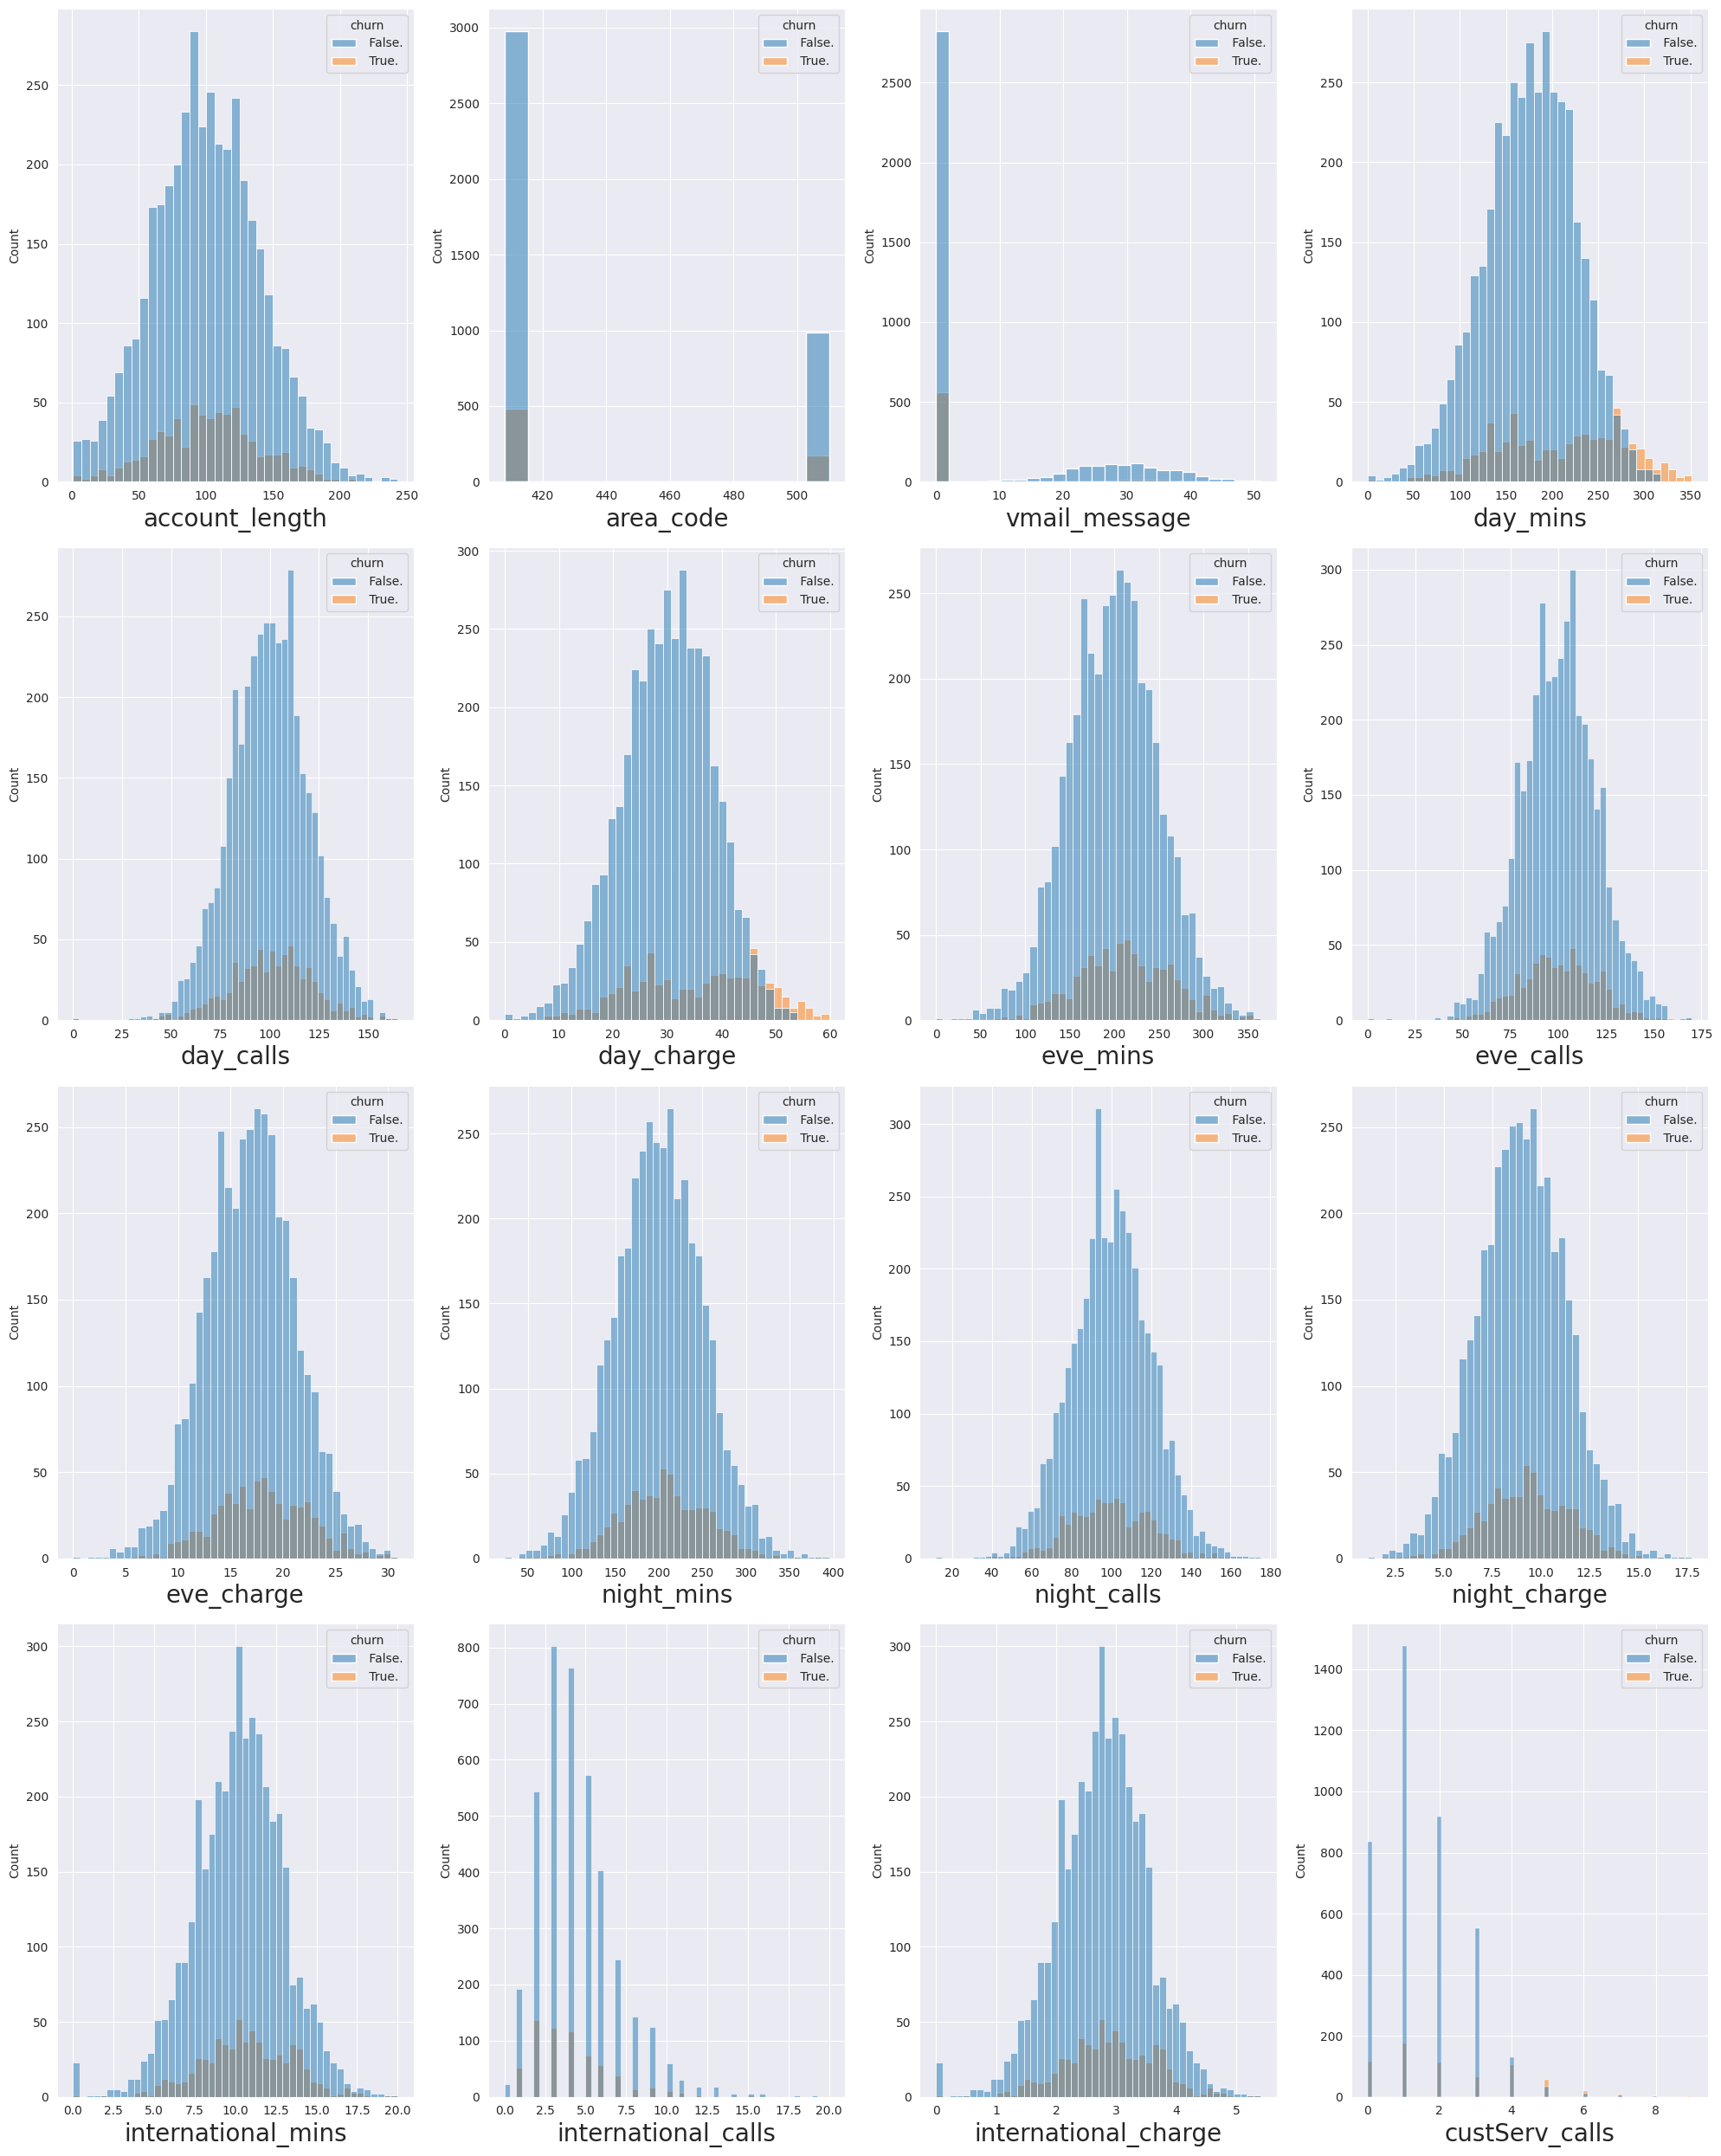

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(['int', 'float']).columns:
        plt.subplot(4,4,plotnumber)
        sns.histplot(x=df[column],hue=df.churn)
        plt.xlabel(column,fontsize=20)
        plotnumber= plotnumber + 1
plt.tight_layout()

* Almost all the numerical columns are normally distributed.
* Since most of the customer have opted out for voice mail plan, we can notice that there are significantly large number of customers who did not send voice mail messages.
* International calls and customer service calls appeared slightly right skewed.

In [ ]:
def modify_churn(x):

    """
    Modifies the churn value to a binary representation.

    Args:
        x (str): The churn value.

    Returns:
        int: The modified churn value, represented as 1 if ' True.' and 0 otherwise.
    """

    if x==' True.':
        return 1
    else:
        return 0

In [ ]:
def remove_space(x):

    """
    Removes leading and trailing spaces from a string.

    Args:
        x (str): The input string.

    Returns:
        str: The input string with leading and trailing spaces removed.
    """

    new_x=x.strip()

    return new_x

In [ ]:
#processing columns
df['churn']=df['churn'].apply(modify_churn)
df['international_plan']=df['international_plan'].apply(remove_space)
df['vmail_plan']=df['vmail_plan'].apply(remove_space)

## Churned & Not churned

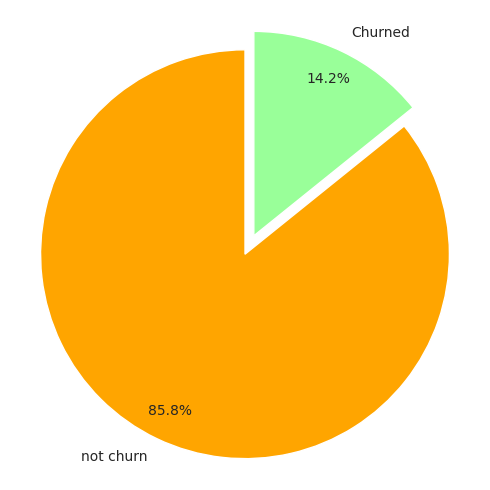

In [ ]:
# number of customers who churned and who did not churn
churn_count = df['churn'].value_counts()

# pie chart to visualize the distribution of customer churn
labels = ['not churn', 'Churned']
sizes = churn_count.values.tolist()

#colors
colors = ['orange', '#99ff99']


fig1, axes = plt.subplots(figsize=(5,5))
axes.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05))
#draw circle
circle = plt.Circle((4,4),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Equal aspect ratio ensures that pie is drawn as a circle
axes.axis('equal')
plt.tight_layout();


As churned and not churn are imbalanced we, can balance it by using smoting

## Account Length & International Plan

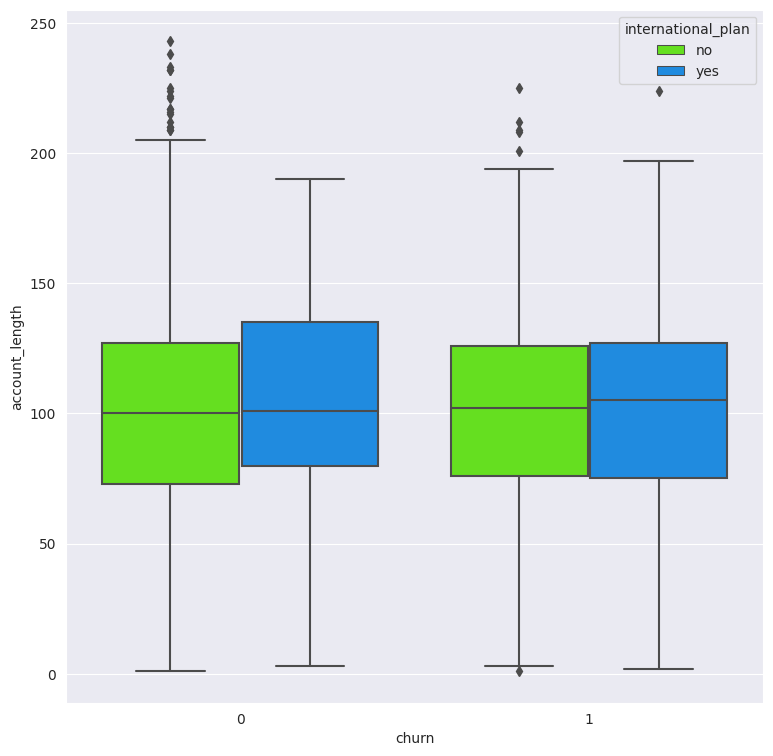

In [ ]:
plt.figure(figsize=(9,9))
sns.boxplot(x='churn', y='account_length', hue='international_plan', data=df, palette='gist_rainbow')
plt.show()

* The plot help us to visualize whether the "International Plan" feature has an impact on account length or churn.
* All the 4 boxplot appeared to almost aligned and having same size.
* There is also a minimal difference between median values of all the boxplots.
* From the plot suggests that it does not matter whether or not a customer had an international plan, as far as predicting customer churn

## CustService calls and voice-mail plan

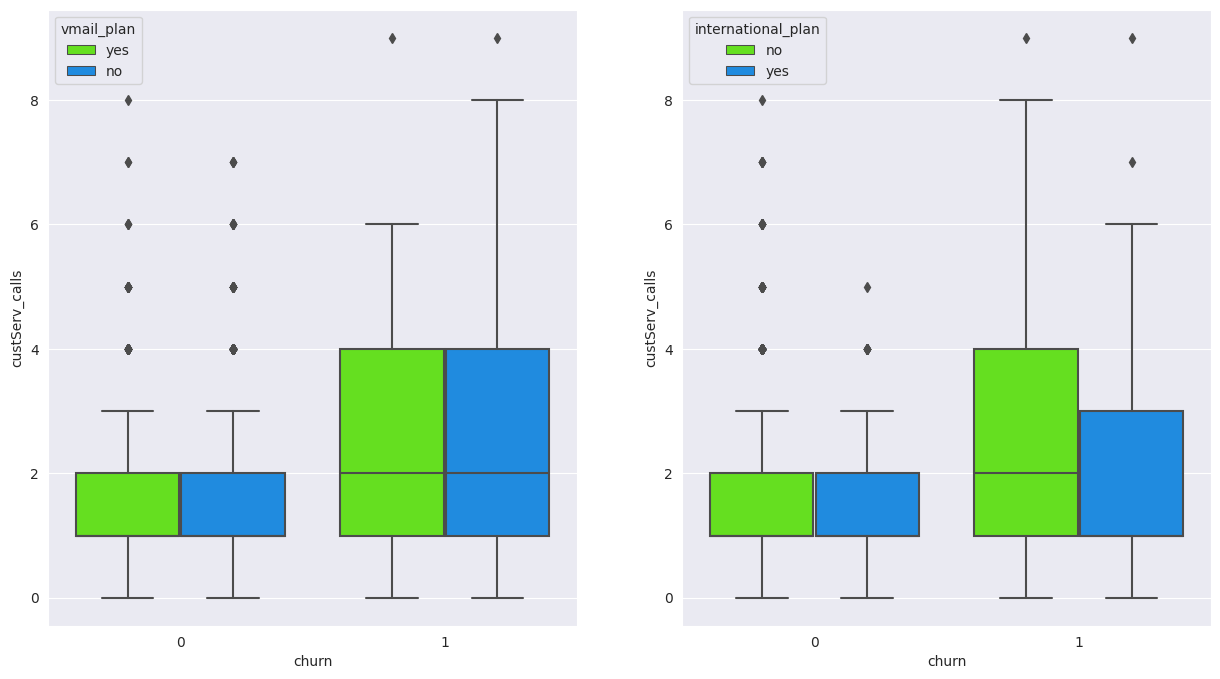

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'churn', y = 'custServ_calls', hue='vmail_plan', data = df, palette='gist_rainbow');

plt.subplot(1,2,2)
sns.boxplot(x = 'churn', y = 'custServ_calls', hue='international_plan', data = df, palette='gist_rainbow');


* It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls.

## Categorical Columns

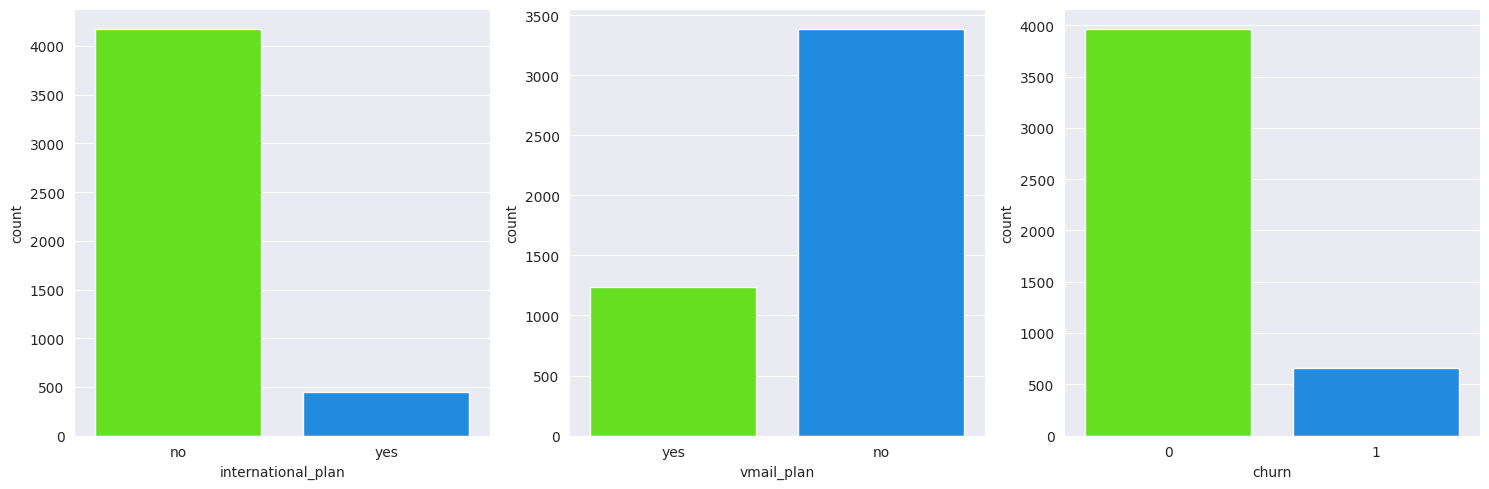

In [ ]:
cat_columns = ['international_plan', 'vmail_plan', 'churn']

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for cat, ax in zip(cat_columns, axs.flatten()):
    sns.countplot(x=cat, data=df, ax=ax, palette='gist_rainbow')
plt.tight_layout()

* The dataset is evidently imbalanced.
* The imbalance is not just limited to target variable but also to independent variables
* The frequency distribution shows a class imbalance, with the "no" category being much more prevalent than the "yes" category.
* The presence or absence of an international plan may be an important feature in predicting customer churn, as it could indicate a higher or lower level of engagement with the telecom provider's services.
* The count of "no" values in the vmail_plan is 3381, which is significantly higher than the count of "yes" values, which is 1236.
* This suggests that a large majority of customers (almost 74%) do not have a voicemail plan.
* There are 3961 instances of "False." in the column "churn", which indicates that a large majority (about 85%) of the customers in the dataset did not churn.
* On the other hand, there are 656 instances of "True." in the column "churn", which indicates that a relatively small minority (about 14%) of the customers in the dataset churned

# Bivariate Analysis

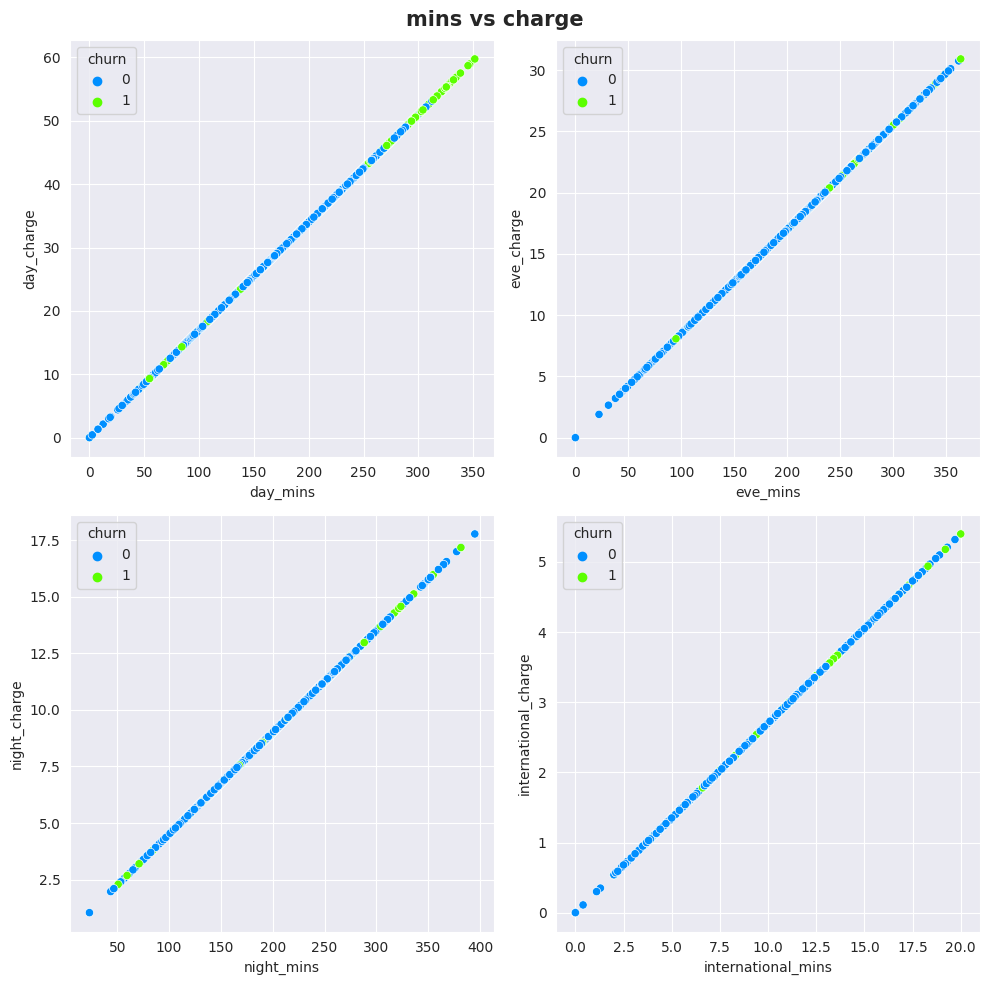

In [ ]:
#x and y both are continous(float) so, scatter plot
types = ['day', 'eve', 'night', 'international']

fig, ax = plt.subplots(2,2, figsize=(10,10))

for type, ax in zip(types, ax.flatten()):
    sns.scatterplot(x=type+"_mins", y=type+"_charge", data=df, ax=ax, hue="churn", palette='gist_rainbow_r');

plt.suptitle('mins vs charge', fontsize=15, fontweight='bold')
plt.tight_layout()

* We can clearly see that more the call mins more are the charges. These two features are strongly correlated for each type(day, eve, night, international)
* In the first plot, we can also observe that the green dots are concentrated on the top right side, indicating that customer who left(churn) used to talk more during day time and hence paid more charges
* This finding will help us reduce the dimentionality of the dataset

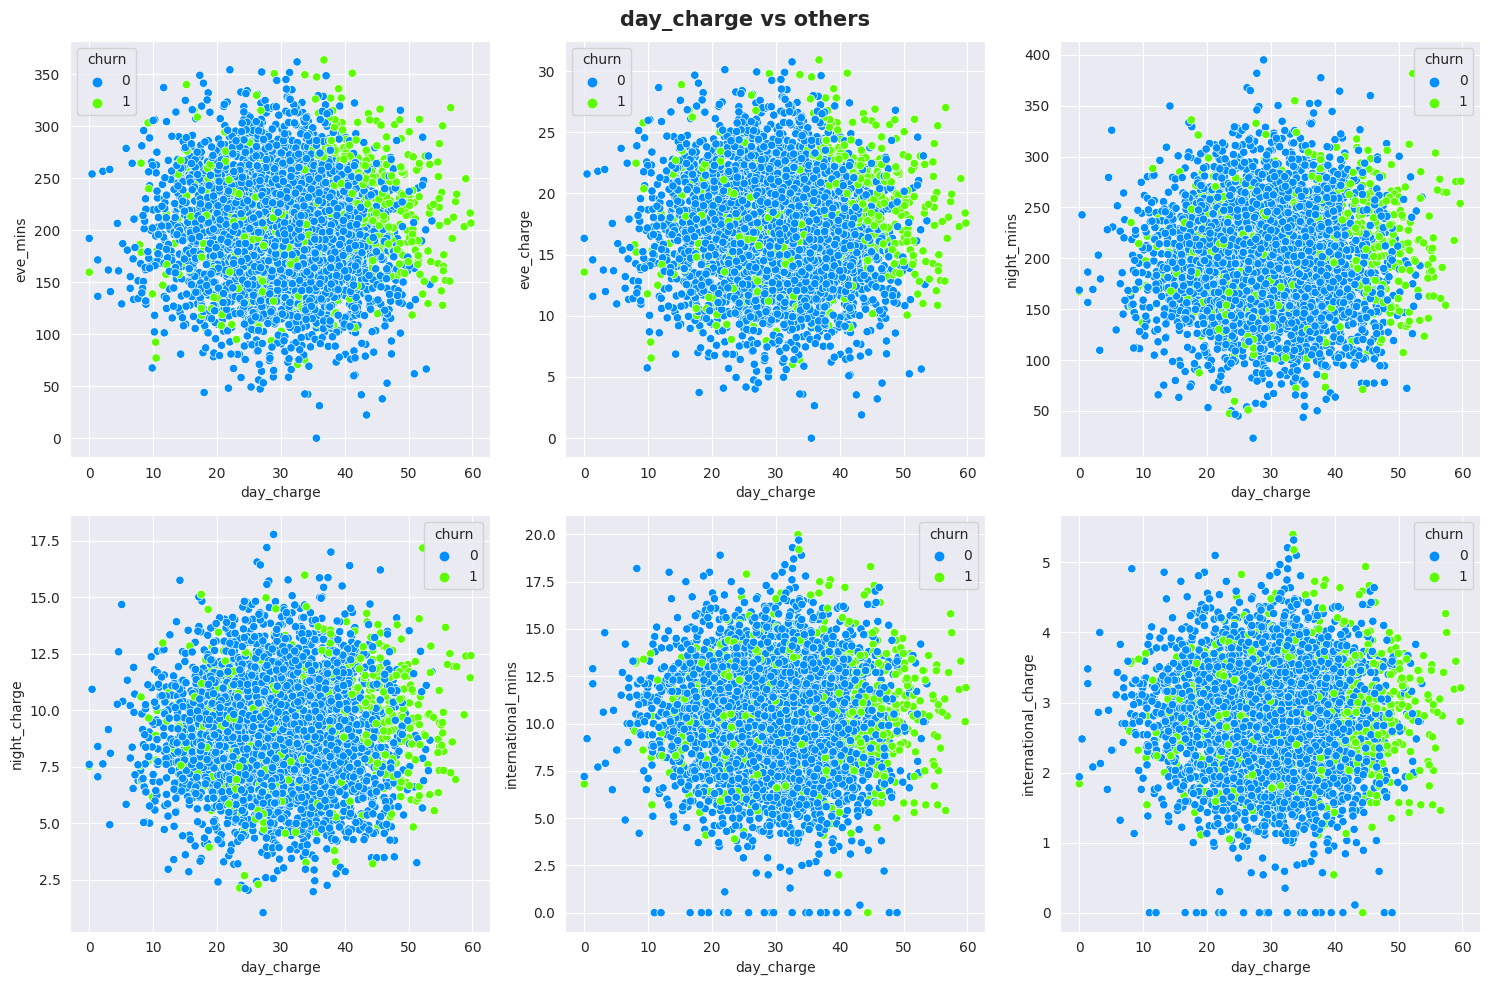

In [ ]:
relations=['eve_mins', 'eve_charge', 'night_mins', 'night_charge', 'international_mins', 'international_charge']

fig, ax = plt.subplots(2,3, figsize=(15,10))

for relation, ax in zip(relations, ax.flatten()):
        sns.scatterplot(x='day_charge', y=relation, data=df, ax=ax, palette='gist_rainbow_r', hue="churn");

plt.suptitle('day_charge vs others', fontsize=15, fontweight='bold')
plt.tight_layout()

* From the above plots, color differentiation help us notice that green dots are concentrated on the right side of the plots. This implies, customer switched to competitors had spend more time talking on call during day time and, as a result, paid higher day charge(30).
* These scatterplot suggest that day charges might be the strong reason for customer churn

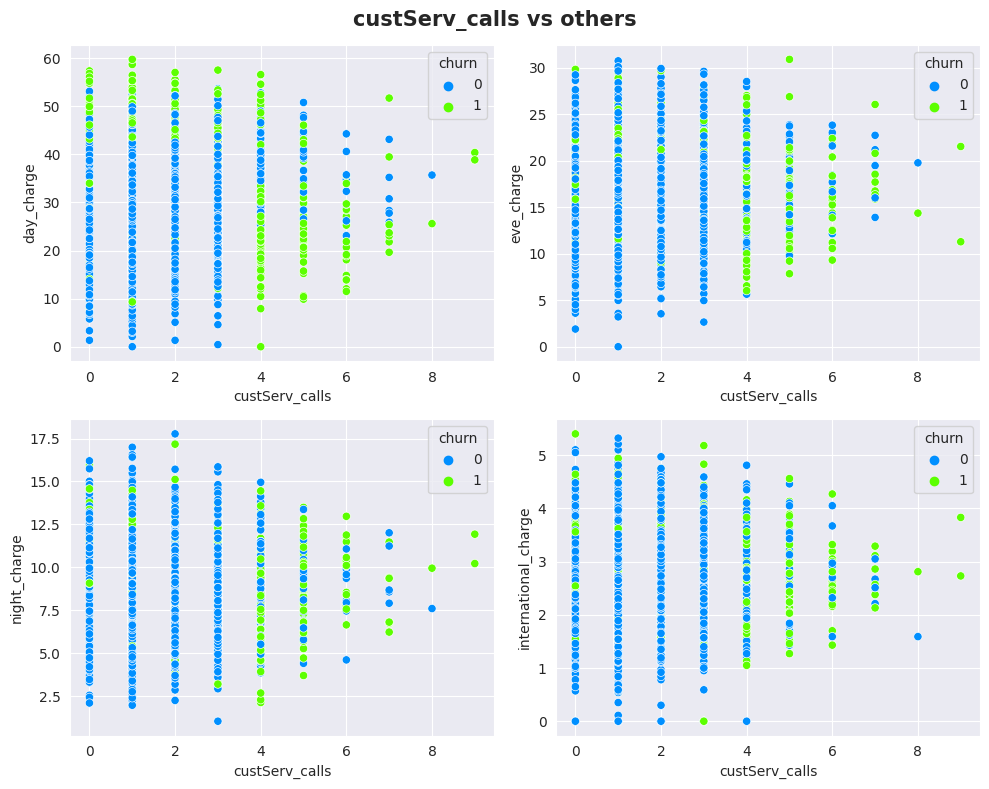

In [ ]:
relations=['day_charge', 'eve_charge', 'night_charge', 'international_charge']

fig, ax = plt.subplots(2,2, figsize=(10,8))

for relation, ax in zip(relations, ax.flatten()):
        sns.scatterplot(x='custServ_calls', y=relation, data=df, ax=ax, hue="churn", palette='gist_rainbow_r');

plt.suptitle('custServ_calls vs others', fontsize=15, fontweight='bold')
plt.tight_layout()

* Green dots are crowded on the side where customers had called customer service more number of times.
* Approximately, customers who made 4 or more calls were likey to churn more.
* From the first graph, we can see that day charge also contribute in churning of customers as green dots are gathered on the top as well



## Comparison of churn rate between customers with and without international plan:

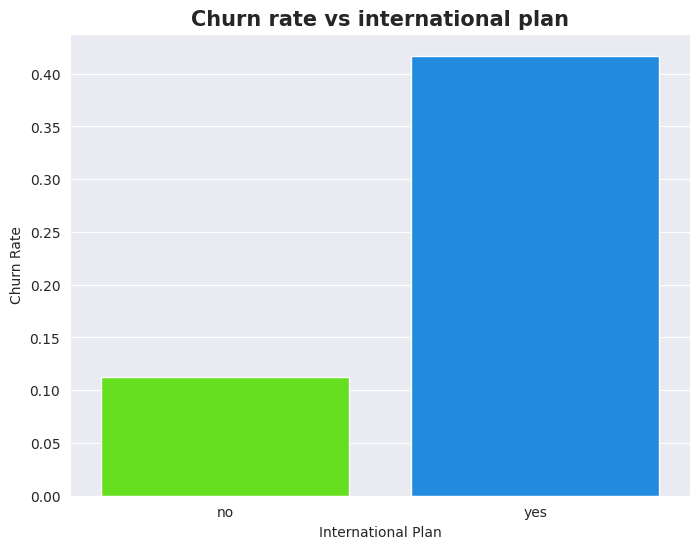

In [ ]:
# Group the data by international_plan and churn and count the number of occurrences
churn_by_intlplan = df.groupby(['international_plan', 'churn']).size().unstack()

# Calculate the churn rate for each group
churn_by_intlplan['churn_rate'] = churn_by_intlplan[1] / (churn_by_intlplan[0] + churn_by_intlplan[1])

# Plot the churn rate for each group
plt.figure(figsize=(8,6))
sns.barplot(x='international_plan', y='churn_rate', data=churn_by_intlplan.reset_index(), palette='gist_rainbow')
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.title('Churn rate vs international plan', fontsize=15, fontweight='bold');

* In the group without an international plan, there were 3701 customers who did not churn and 470 customers who churned. This gives a churn rate of 11.3%.

* In the group with an international plan, there were 260 customers who did not churn and 186 customers who churned. This gives a higher churn rate of 44.7%.
Therefore, it appears that customers with an international plan are more likely to churn than customers without an international plan.

## Top States where customer churned the most

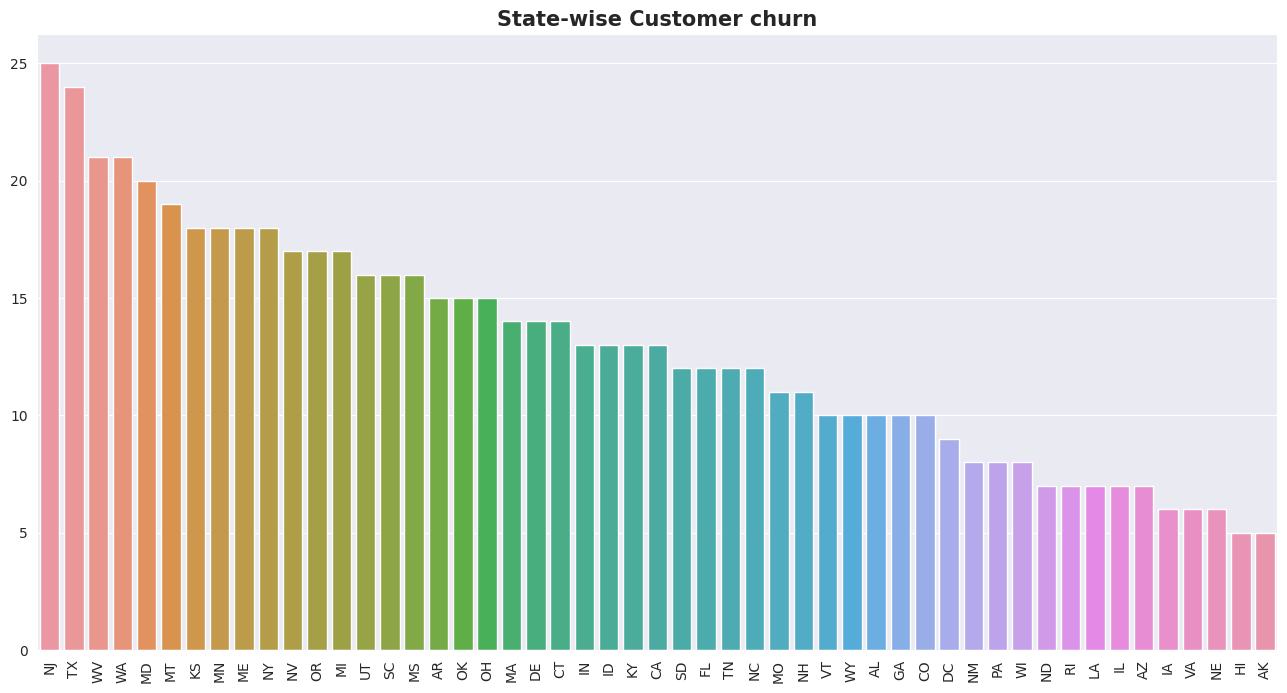

In [ ]:
churned= df[df['churn']==1].groupby('state')['area_code'].count().sort_values(ascending=False)

plt.figure(figsize=(16,8))
sns.barplot(x= list(churned.keys()), y = list(churned.values), alpha= 1)
plt.xticks(rotation=90)
plt.title('State-wise Customer churn', fontsize=15, fontweight='bold');

* The number of customers who churned varies across different states, with the highest number being 25 and the lowest being 5.
* The top 3 states with the highest number of customers churned are NJ, TX, and WV with 25 to 21 customers churned, followed by MN, ME, and KS with 18 customers churned each.
* The bottom 2 states with the lowest number of customers churned are HI, and AK, with only 5 customers churned each.

Let's also compare the number of customer churned in each state to the total number of customers in that state. This would give us a churn rate for each state, which could be a better metric for identifying problem areas. For example, if a state has a high churn rate despite having a low number of customer churned, it could indicate that the company has a larger customer base in that state, and therefore, the problem is more significant than it appears.

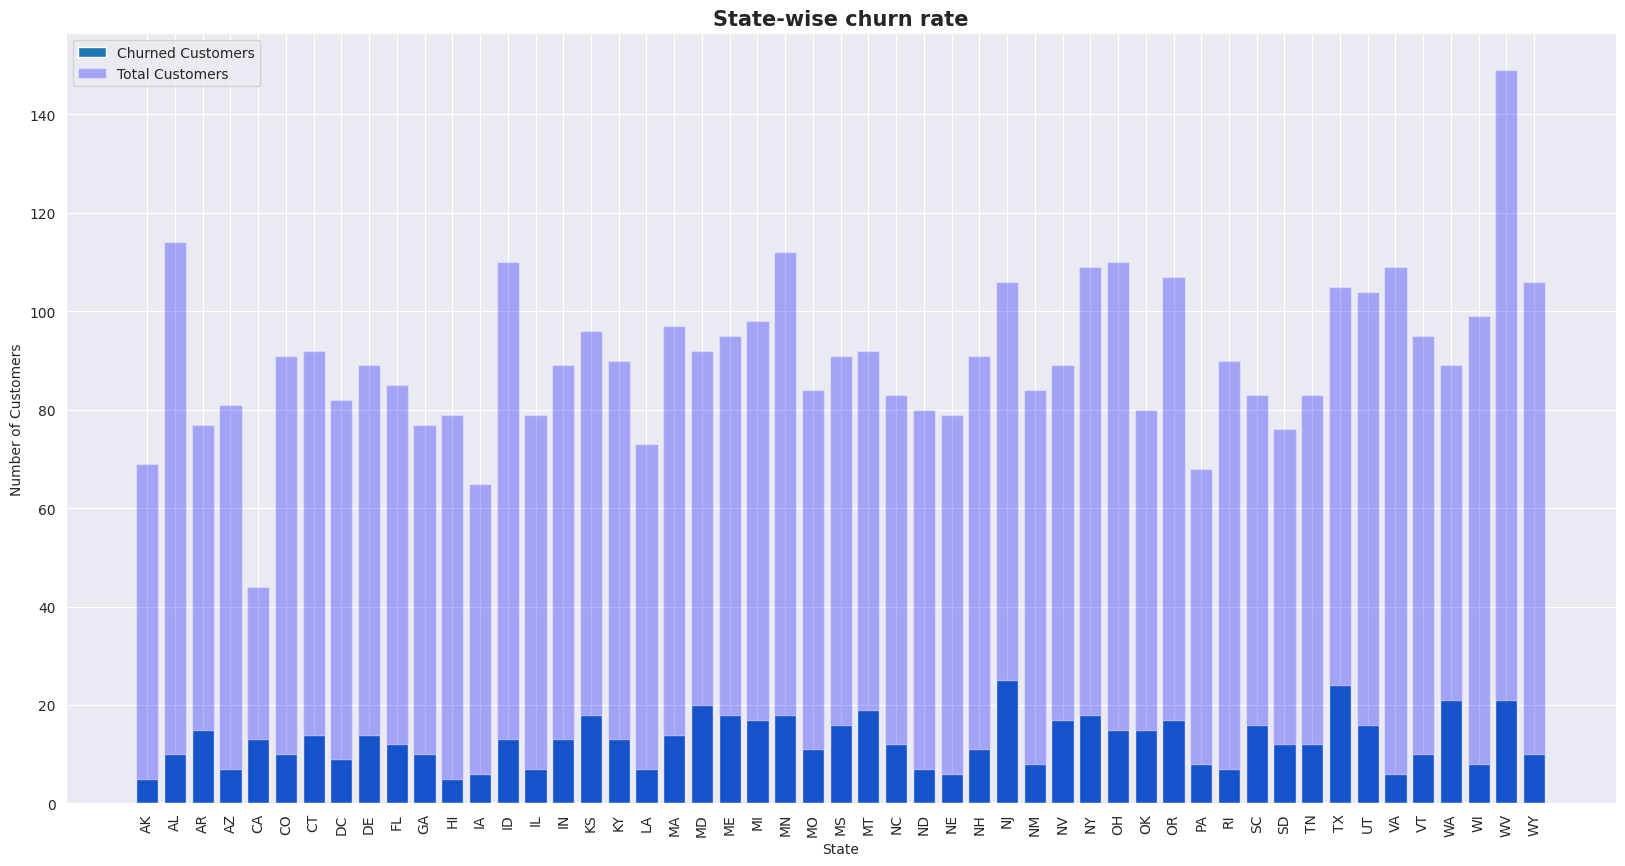

In [ ]:
# the churn rate for each state
churn_rate = df.groupby('state')['churn'].mean()

# total number of customers for each state
total_customers = df['state'].value_counts()

# churned customers for each state
churned_customers = churn_rate * total_customers

# bar plot for churned customers and total customers by state
plt.subplots(figsize=(20, 10))
plt.bar(churned_customers.index,  churned_customers.values, label='Churned Customers')
plt.bar(total_customers.index, total_customers.values, alpha=0.3, label='Total Customers', color='#0000FF')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.legend()
plt.xticks(rotation=90)
plt.title('State-wise churn rate', fontsize=15, fontweight='bold');

* The state with the highest churn rate is NJ with 25 out of 110 customers churning, which is around 23% churn rate.
* TX has the second-highest churn rate with 24 out of 105 customers churning, which is around 22% churn rate.
* WV (West Virginia) has the third-highest churn rate with 21 out of 117 customers churning, which is around 17.9% churn rate.
* The states with the lowest churn rates are HI (Hawaii), AZ (Arizona), and GA (Georgia) with only 5 out of 63, 7 out of 62, and 10 out of 59 customers churning, respectively. This gives a churn rate of around 7%, 11%, and 15%, respectively.
There seems to be no clear relationship between the number of customers in a state and the churn rate.

## Feature Selection
### Heat Map

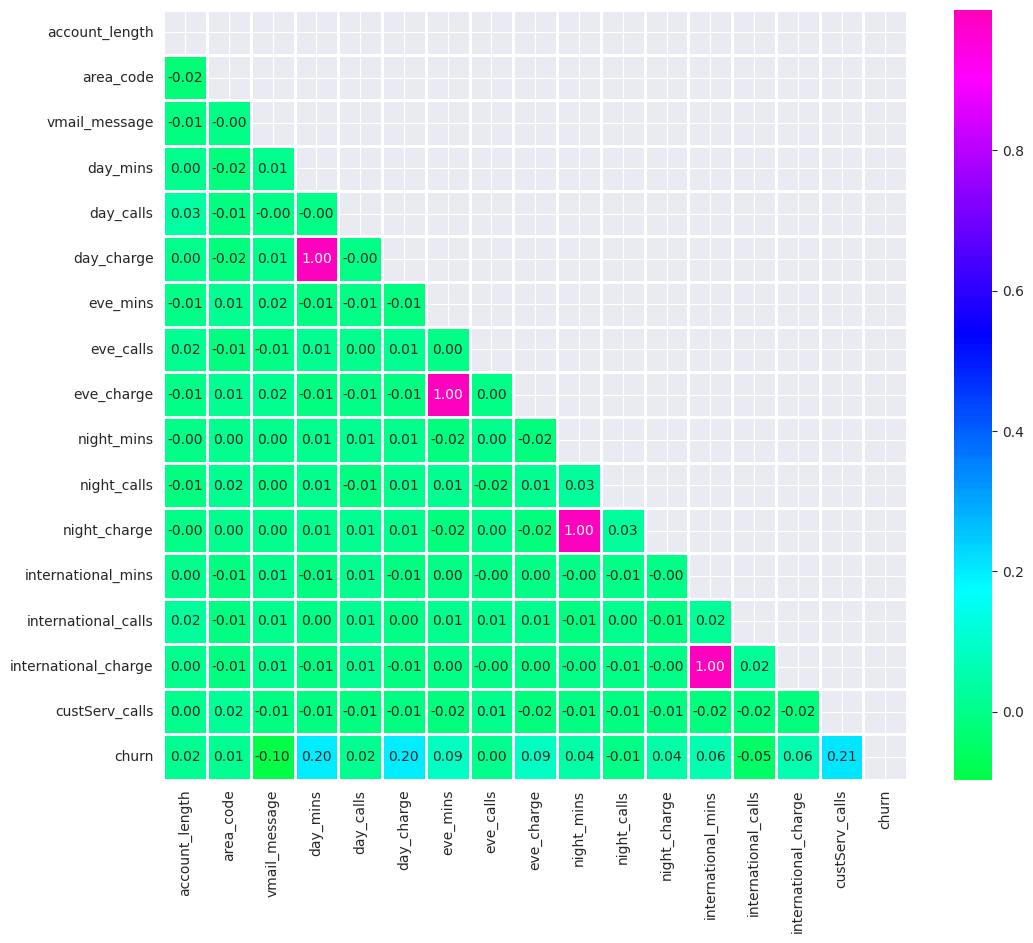

In [ ]:
corr= df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))

#heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='gist_rainbow', linewidths=1, annot=True, fmt='.2f');

* Positive correlations: The features "day_mins," "day_charge," "eve_mins," "eve_charge," "night_mins," "night_charge," "international_mins," "international_charge," and "custServ_calls" show positive correlations with the churn column. This suggests that as these features increase, the likelihood of churn also increases. Specifically, factors such as longer call duration (day, evening, night, and international), higher charges, and more customer service calls are associated with a higher probability of churn.

* Negative correlation: The feature "vmail_message" shows a negative correlation with the churn column. This implies that customers who have a higher number of voicemail messages are less likely to churn. It suggests that the availability and use of voicemail services may contribute to customer retention.

* Weak correlations: The features "account_length," "area_code," "day_calls," "eve_calls," "night_calls," and "international_calls" show weak correlations with the churn column. These correlations are close to zero, indicating that these factors have minimal influence on churn.

*  Overall influence: The highest correlation is observed between the churn column and the "custServ_calls" feature, with a correlation coefficient of 0.21. This indicates that the number of customer service calls has a relatively stronger relationship with churn compared to other features.

Based on these observations, it appears that factors related to call duration, charges, and customer service calls have a significant impact on churn. Understanding and managing these factors effectively may help in reducing churn rates and improving customer retention strategies. Additionally, the negative correlation with "vmail_message" suggests that voicemail services could be a potential factor in retaining customers.

## Droping highly correlated columns:

In [ ]:
df.drop(columns=['day_mins', 'eve_mins', 'night_mins', 'international_mins'], inplace=True)

* From the correlation heatmap, we observed that mins column is strongly correlated with charge columns for day, evening, night and international calling
* We will drop all mins columns and keep charge columns as charge column would be representative of calling minutes and charge per miniute.

# Data Processing
### Dropping Irrelevant columns

In [ ]:
df.drop(columns=['state', 'area_code', 'phone'], inplace=True)

* We have run the models by keep columns state and area code, but the results were poor than model without these features
* We observe that, by keeping these columns increases the dimensionality of the data and worsen the model performance.
* Hence, we have decided that we will drop these columns

## Outliers

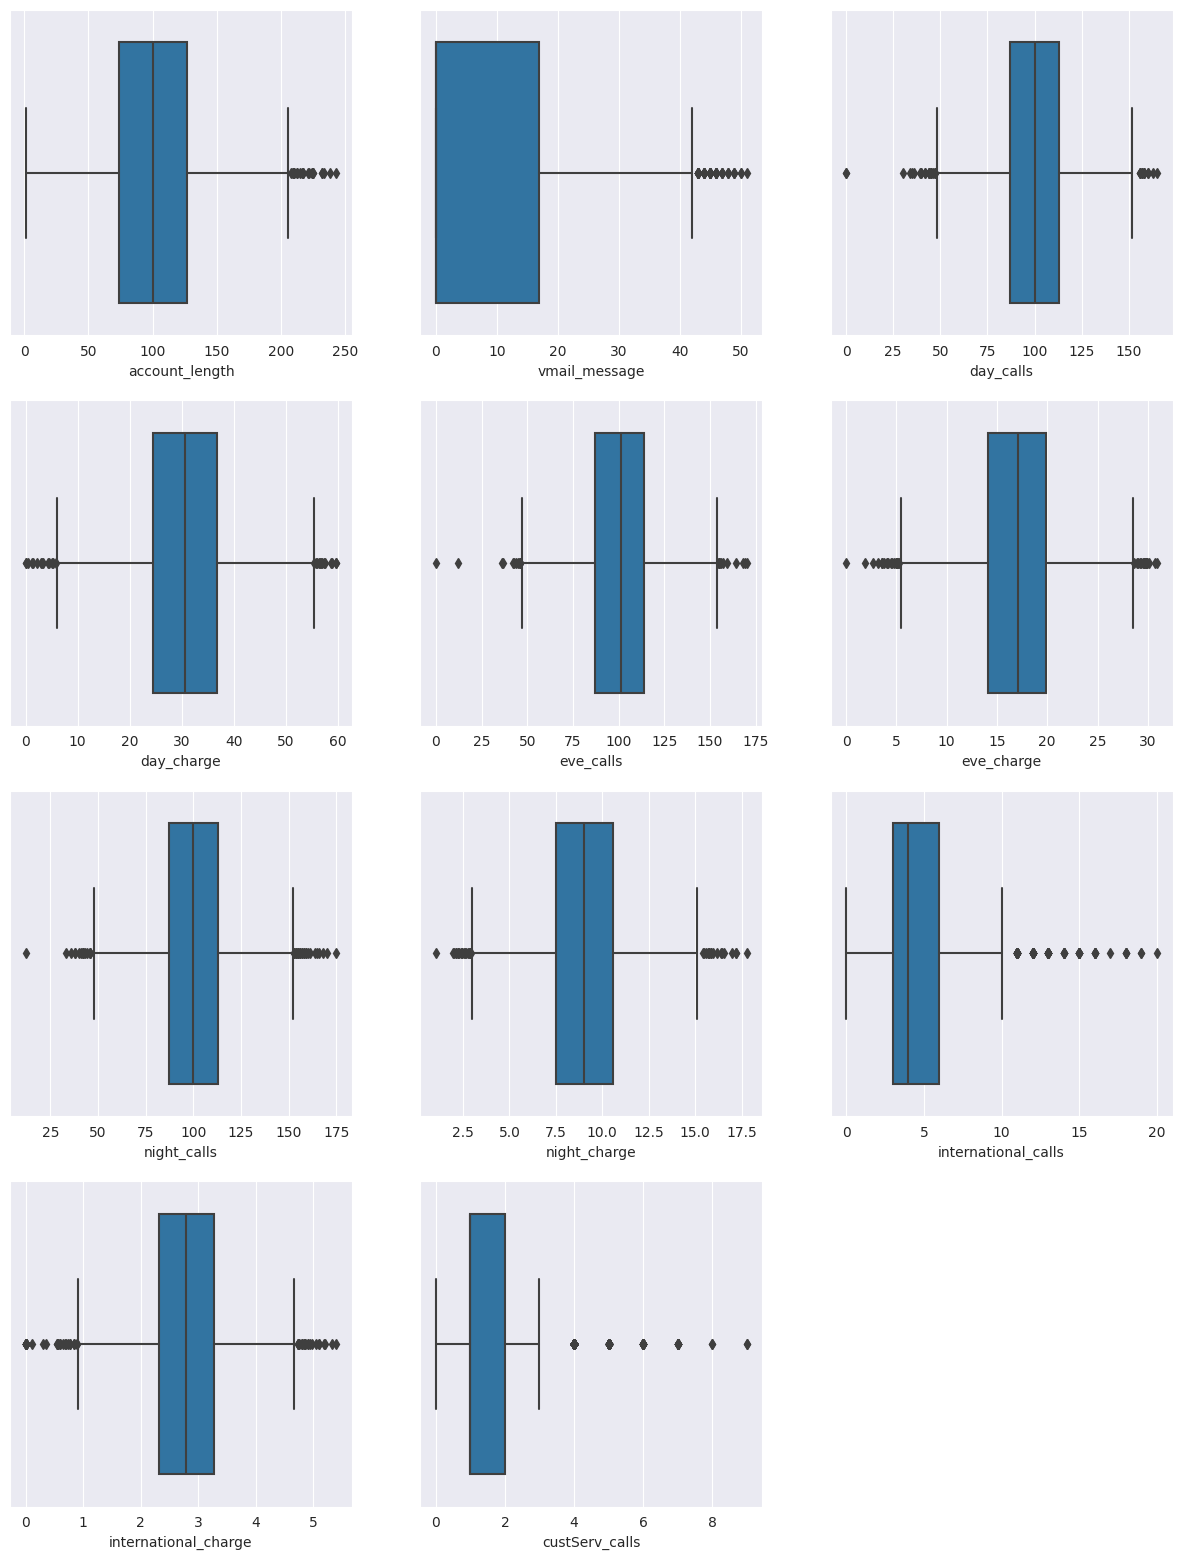

In [ ]:
#keeping numeric data only
data=df.drop(columns=['international_plan', 'vmail_plan', 'churn'])

plt.figure(figsize=(15,60), facecolor='white')
plotnumber=1

for i in data:
    plt.subplot(12,3,plotnumber)
    sns.boxplot(x=df[i], data=df)
    plt.xlabel(i)
    plotnumber+=1
plt.show()

* It seems that all the numeric columns have outliers
* All the column except custServ_calls have lesser outliers than 5%
* Only custServ_call have highest number outliers which is almost 8%




It seems that values more than 3 in custServ_calls considered to the outliers. Dropping these values does not make sense as it is quite possible that customers can make more than 3 calls to customer service. Dropping these outliers leads to missing out on the big proportion of the data. So, we will not drop these outliers as they would still not be considered as extreme values

# Model Creation

## Splitting Features and Labels

In [ ]:
X=df.drop('churn', axis=1)
y=df.churn

## Column Transformer

In [ ]:
cat_cols=df.select_dtypes('object').columns
num_cols=[col for col in X.columns if col not in cat_cols]

preprocessor= ColumnTransformer([
    ('cat', OrdinalEncoder(categories=[['no', 'yes'], ['no', 'yes']]), cat_cols),
    ('num', StandardScaler(), num_cols)
])

In [ ]:
#fit and transform the data using the processing pipeline
X_processed = preprocessor.fit_transform(X)

#converting to dataframe
X_processed=pd.DataFrame(X_processed, columns=X.columns)

## Balacing the data

In [ ]:
smote=SMOTE(random_state=42)
X_sm, y_sm= smote.fit_resample(X_processed, y)

print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_sm))

Actual Classes Counter({0: 3961, 1: 656})
SMOTE Classes Counter({0: 3961, 1: 3961})


## Creating Train and Test Set

In [ ]:
# splitting train and test set
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Model Development

In [ ]:
def check_result(test, pred):
  """
    Prints out the classification report, accuracy score, precision score, F1 score, ROC AUC score, and confusion matrix
    for a given set of test and predicted labels.

    Args:
        test (array-like of shape (n_samples,)): Ground truth (correct) target values.
        pred (array-like of shape (n_samples,)): Estimated targets as returned by a classifier.

    Returns:
        None
    """

  print(classification_report(test, pred))
  print('=========================================')
  print('Accuracy', accuracy_score(test, pred))
  print('=========================================')
  print('precision', precision_score(test, pred))
  print('=========================================')
  print('recall', recall_score(test, pred))
  print('=========================================')
  print('F1 score', f1_score(test, pred))
  print('=========================================')
  print('ROC AUC score', roc_auc_score(test, pred))
  print('=========================================')
  print('Confusion matrix')
  print(confusion_matrix(test, pred))

## Comparing Cross Validation Scores

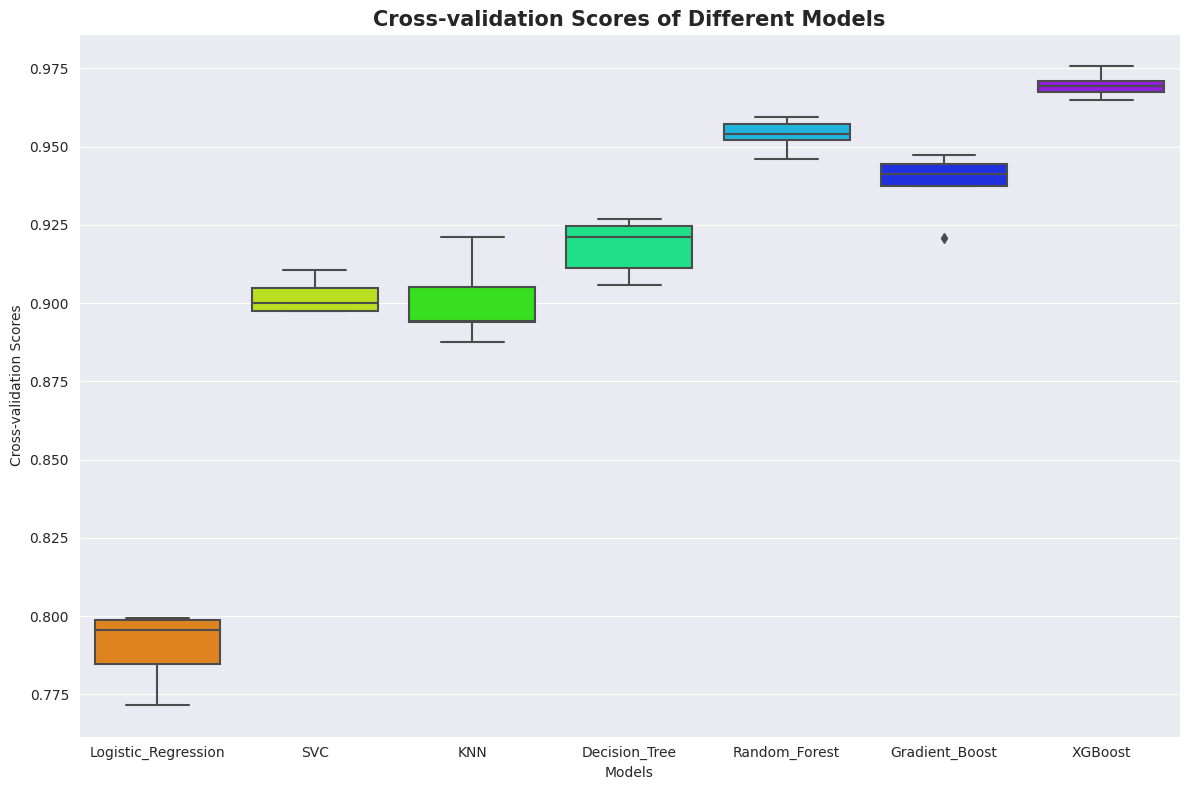

In [ ]:
models= {'Logistic_Regression': LogisticRegression(),
        'SVC': SVC(),
        'KNN': KNeighborsClassifier(),
        'Decision_Tree': DecisionTreeClassifier(),
        'Random_Forest': RandomForestClassifier(),
        'Gradient_Boost': GradientBoostingClassifier(),
        'XGBoost': XGBClassifier()}

cv_scores_models={}

for name, model in zip(models.keys(), models.values()):
        kf= KFold(n_splits=5, shuffle=True, random_state=42)
        scorer=make_scorer(f1_score)
        cv_scores= cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
        cv_scores_models[name]=cv_scores

plt.figure(figsize=(12, 8))
sns.boxplot(data=list(cv_scores_models.values()), palette='gist_rainbow')
plt.xticks(ticks=range(len(cv_scores_models.keys())), labels=cv_scores_models.keys())
plt.xlabel('Models')
plt.ylabel('Cross-validation Scores')
plt.title('Cross-validation Scores of Different Models', fontsize=15, fontweight='bold')
plt.tight_layout();

# **Model Comparision Report**

* Logistic Regression has relatively lower f1 scores compared to other models, ranging from 0.7716 to 0.7951.
* K-Nearest Neighbors (KNN) performs well with f1 scores ranging from 0.8983 to 0.9392, showing consistent performance across folds.
* Support Vector Classifier (SVC) also performs consistently well with scores ranging from 0.8818 to 0.9163.
8 Decision Tree achieves f1 scores ranging from 0.9101 to 0.9351, indicating a stable performance.
* Random Forest exhibits high f1 scores ranging from 0.9499 to 0.9661, suggesting strong predictive capabilities.
* Gradient Boosting performs consistently well, with f1 scores ranging from 0.9251 to 0.9393.
* XGBoost shows excellent performance with scores ranging from 0.9603 to 0.9744, indicating high predictive power.

Based on these observations, the top two models to consider for selection are:

* XGBoost: It consistently achieves the highest f1 scores among all models and shows robust performance across different folds.

* Random Forest: It also exhibits high f1 scores and performs consistently well, making it another strong contender for selection.

These two models, XGBoost and Random Forest, stand out as top performers and are recommended for further evaluation and comparison based on other factors such as model complexity, interpretability, computational requirements, and specific objectives of the task.

# Recursive Feature Extraction (RFE)

In [ ]:
xgb=XGBClassifier()
rfe= RFE(xgb, n_features_to_select=10, verbose=1)
rfe.fit(X_train, y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=None, num_parallel_tree=None, predictor=None,
                            random_state=None, ...),
    n_features_to_select=10, verbose=1)

## Feature Selection

### Processing

In [ ]:
X_selected= X[list(X.columns[rfe.support_])]

cat_col_selected=X_selected.select_dtypes('object').columns
num_col_selected=[col1 for col1 in X_selected.columns if col1 not in cat_cols]

preprocessor= ColumnTransformer([
    ('cat', OrdinalEncoder(categories=[['no', 'yes']]), cat_col_selected),
    ('num', StandardScaler(), num_col_selected)
])

In [ ]:
#fit and transform the data using the processing pipeline
X_processed_selected = preprocessor.fit_transform(X_selected)
#converting to dataframe
X_processed_selected=pd.DataFrame(X_processed_selected, columns=X_selected.columns)

### Balacing the data

In [ ]:
smote=SMOTE(random_state=42)
X_sm, y_sm= smote.fit_resample(X_processed_selected, y)

print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_sm))

Actual Classes Counter({0: 3961, 1: 656})
SMOTE Classes Counter({0: 3961, 1: 3961})


In [ ]:
# splitting train and test set
X_train_new, X_test_new, y_train_new, y_test_new= train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

##Performance evaluation on Test set
### Random Forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_new, y_train_new)
y_pred_rf=rf.predict(X_test_new)

In [ ]:
check_result(y_test_new, y_pred_rf)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       825
           1       0.97      0.94      0.96       760

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585

Accuracy 0.9577287066246056
precision 0.9688768606224628
recall 0.9421052631578948
F1 score 0.9553035356904603
ROC AUC score 0.9571132376395536
Confusion matrix
[[802  23]
 [ 44 716]]


## XGBoost

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train_new, y_train_new)
y_pred_xgb=xgb.predict(X_test_new)

In [ ]:
check_result(y_test_new, y_pred_xgb)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       825
           1       0.98      0.97      0.98       760

    accuracy                           0.98      1585
   macro avg       0.98      0.98      0.98      1585
weighted avg       0.98      0.98      0.98      1585

Accuracy 0.9772870662460568
precision 0.9813829787234043
recall 0.9710526315789474
F1 score 0.9761904761904763
ROC AUC score 0.9770414673046252
Confusion matrix
[[811  14]
 [ 22 738]]


* Accuracy: XGBoost achieves an accuracy of 97.72%, while Random Forest achieves an accuracy of 95.77%. XGBoost has a slightly higher accuracy, indicating that it predicts the correct class slightly more often.

* Precision: XGBoost has a precision of 98.13% for class 1 (churned customers), while Random Forest has a precision of 96.88%. XGBoost has a slightly higher precision, suggesting that it has fewer false positives, i.e., it is better at correctly identifying churned customers.

* Recall: XGBoost achieves a recall of 97.10% for class 1, while Random Forest has a recall of 94.21%. XGBoost has a slightly higher recall, indicating that it captures a higher proportion of actual churned customers.

* F1-score: Both models have similar F1-scores, with XGBoost achieving 97.61% and Random Forest achieving 95.53%. The F1-score considers both precision and recall, and both models perform well in terms of finding the right balance between them.

* ROC AUC score: XGBoost has a higher ROC AUC score of 97.70%, compared to Random Forest's score of 95.71%. This suggests that XGBoost has a better ability to distinguish between positive and negative classes.

* Confusion matrix: Both models have a relatively low number of misclassifications. XGBoost has 14 false negatives (actual churned customers predicted as non-churned) and 22 false positives (actual non-churned customers predicted as churned). Random Forest has 23 false negatives and 44 false positives. XGBoost performs slightly better in terms of false negatives.

## Hyperparameter Tuning

In [ ]:
# Define the XGBoost model
model = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1',n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train_new, y_train_new)

# Get the best hyperparameters and the corresponding f1 score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best hyperparameters on the full training data
best_model = XGBClassifier(**best_params)
best_model.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
best_score

0.9682426897087344

* It can be observed that, after hyperparameter tuning the performace of the model slightly decreases.
* Hence we will go with model without tuning the model

**Based on these observations, XGBoost generally outperforms Random Forest in terms of accuracy, precision, recall, F1-score, ROC AUC score, and the number of misclassifications. Therefore, for this problem of churn prediction, XGBoost is the recommended model as it provides better overall performance.**

## Influencing Factors
### Feature Importance

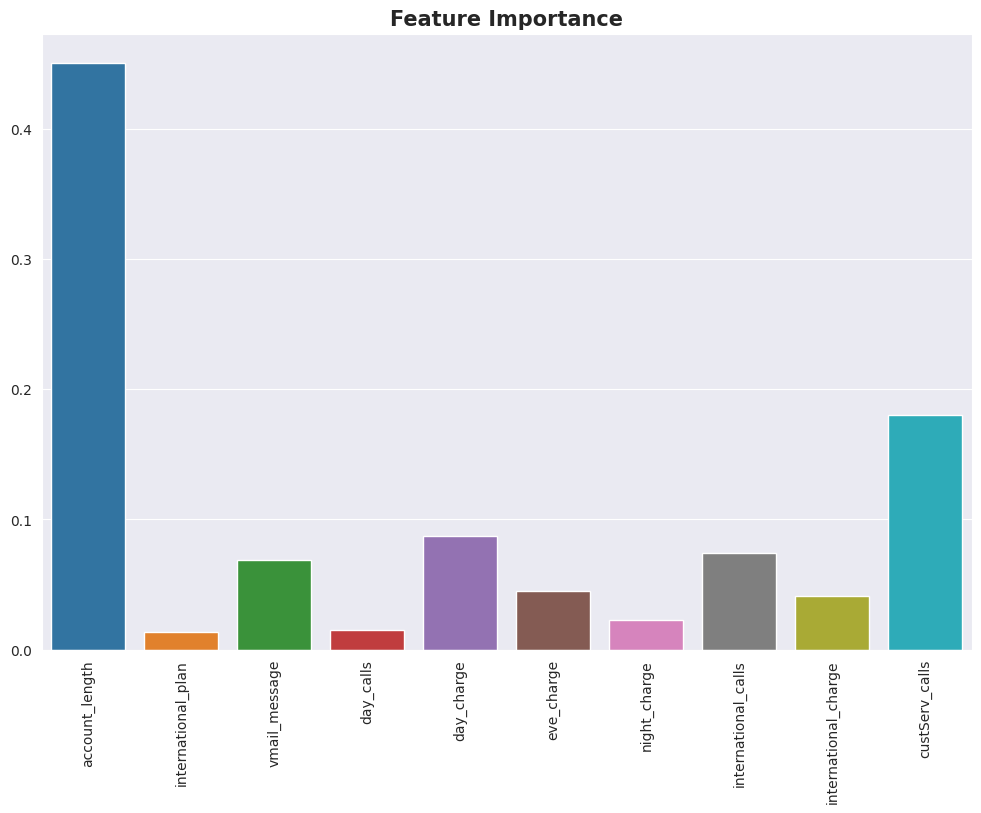

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=list(X_selected.columns), y=xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize=15, fontweight='bold');

## Here are the top 5 influencing factors:

account_length:
* This feature has the highest importance value, indicating that the duration of the customer's account has a significant influence on churn.
* Customers with longer account lengths may be more loyal and less likely to churn.
* Customers who have been with the telecom company for a longer time may have developed loyalty and established relationships with the company's services.
* They might be more familiar with the company's offerings and have a higher level of satisfaction, leading to lower churn rates.
*On the other hand, if customers have been with the company for a long time and still decide to churn, it could indicate dissatisfaction with the services or a need for change.

custServ_calls:
* The number of customer service calls is the second most influential factor.
* The number of customer service calls is a crucial factor that can impact churn rate. A higher volume of customer service calls suggests that customers are facing issues, experiencing dissatisfaction, or encountering problems with the telecom company's services.
* Frequent customer service calls may indicate poor service quality, billing errors, network connectivity problems, or unresolved customer concerns. - When customers are dissatisfied and their issues are not adequately addressed, they are more likely to consider switching to a competitor, resulting in higher churn rates.

day_charge:
* The charges for daytime calls play a significant role in influencing churn. Higher daytime charges may lead customers to explore alternative service providers, resulting in churn.
* The charges for daytime calls can impact churn rate, especially if they are relatively high compared to competitors.
* Higher daytime charges can be a significant factor in customers decision-making process when evaluating telecom services.
* If customers perceive the charges as excessive or uncompetitive, they may consider switching to a provider offering more affordable daytime call rates.
8 Additionally, customers who frequently make daytime calls for business or personal purposes may be more sensitive to the pricing structure, and higher charges could lead to increased churn rates among this customer segment.

vmail Messages:
* The presence or absence of a voicemail plan and the number of voicemail messages can indicate customer engagement and utilization of additional services.
* Customers who actively use voicemail may have a stronger connection to the telecom company and may be less likely to churn.

international_calls:
* The number of international calls made by customers also contributes to churn.
* Higher international call volumes may indicate specific communication needs or preferences that are not being met by the current service provider.
* Customers who frequently make international calls have specific communication requirements, and if the telecom company fails to provide satisfactory international call quality, competitive rates, or reliable connectivity, customers may opt for alternative providers.
* Churn rates may be higher among customers who frequently make international calls if they experience issues such as dropped calls, poor call quality, or expensive international call rates, leading them to seek better alternatives.



These top influencing factors provide valuable insights into the drivers of churn. Customers who have been with the company for a longer duration, make more customer service calls, have international plans, higher daytime charges, and make more international calls are more likely to churn. By focusing on addressing the concerns related to these factors, such as improving customer service, optimizing international plans, offering competitive pricing, and enhancing communication services, the company can potentially reduce customer churn and improve customer retention.

## Churn Risk Score
Churn risk scores play a crucial role in customer retention strategies for businesses operating in highly competitive markets. These scores help companies identify customers who are at a higher risk of churning or switching to a competitor. By quantifying the probability of churn, businesses can proactively target these customers with personalized retention campaigns and offers.

We have multiplied probabilites of churn by 100 to get the values in the range 0 to 100

In [ ]:
# Generate churn risk scores
churn_risk_scores = xgb.predict_proba(X_test_new)[:, 1]

# Add churn risk scores to the test set
X_test_with_scores = X_test_new.copy()
X_test_with_scores['churn_risk_score'] = churn_risk_scores *100

## Churn Flag

In [ ]:
X_test_with_scores['Churned'] = y_test_new
X_test_with_scores['prediction'] = y_pred_xgb
X_test_with_scores['Churn_flag'] = X_test_with_scores['prediction'].apply(lambda x: 'YES' if x == 1 else 'NO')

In [ ]:
X_test_with_scores.head(3)

,account_length,international_plan,vmail_message,day_calls,day_charge,eve_charge,night_charge,international_calls,international_charge,custServ_calls,churn_risk_score,Churned,prediction,Churn_flag
6403,0.0,0.434475,-0.577587,0.469763,1.530187,0.803610,-0.757176,0.060432,1.661096,1.096480,98.891190,1,1,YES
315,0.0,-1.556977,-0.577587,2.914642,-2.223871,2.092989,-1.516191,-0.583487,0.771261,-0.433885,0.013558,0,0,NO
3947,0.0,1.297070,-0.577587,-1.511722,0.671679,-0.944107,-0.386144,0.637341,0.475694,-0.433885,0.131514,0,0,NO


## Deployment

In [ ]:
#xgb model
pickle.dump(xgb, open('model.pkl', 'wb'))
#preprocessor
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))

## Result:
* The trained XGBoost model achieved a high predictive accuracy in identifying churn customers.
* We evaluated the model's performance using metrics such as accuracy, precision, recall, and F1-score, with a particular focus on the F1-score due to the imbalanced nature of the dataset.
* The model demonstrated promising results with f1 score of 97%, indicating its ability to accurately identify potential churn customers.

## Project Impact:
* The churn prediction model developed in this project can be instrumental in helping No-Churn Telecom proactively retain customers and improve customer satisfaction.
* By identifying customers at risk of churn, targeted retention campaigns can be designed, and personalized offers can be provided to mitigate customer churn.
*This can lead to increased customer loyalty, reduced churn rate, and improved business profitability.

Throughout the project, we followed best practices in data science, including data preprocessing, feature engineering, model selection, and performance evaluation. The project highlighted the importance of understanding business objectives, feature engineering, and model selection for solving real-world problems. It also showcased the effectiveness of XGBoost in churn prediction tasks.

## **Report on Challenges faced**

* One of the significant challenges in this project was dealing with an imbalanced dataset, where the number of churn customers was relatively small compared to non-churn customers.
* To overcome this challenge, we employed over sampling technique and focused on appropriate evaluation metrics like F1-score.
* Another challenge was selecting the most relevant features from a large set of available variables.
* Applying feature selection methods like correlation analysis and feature importance from the XGBoost model helped us address this challenge.